In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
%matplotlib inline

In [46]:
CS137Peaks = np.array([165.80])
CS137Energy = np.array([661.7]) #KeV

In [47]:
BA133Peaks = np.array([21.42, 76.92, 90.52])
BA133Energy = np.array([81.0, 302.9, 356.0])

In [48]:
Mn54Peaks = np.array([207.48])
Mn54Energy = np.array([834.8])

In [49]:
Na22Peaks = np.array([128.54])
Na22Energy = np.array([511.0])

In [50]:
CO57Peaks = np.array([31.79])
CO57Energy = np.array([122.1])

In [51]:
Peaks = np.hstack([CS137Peaks,BA133Peaks,Mn54Peaks,Na22Peaks,CO57Peaks])

In [52]:
Peaks

array([ 165.8 ,   21.42,   76.92,   90.52,  207.48,  128.54,   31.79])

In [53]:
Energy = np.hstack([CS137Energy,BA133Energy,Mn54Energy,Na22Energy,CO57Energy])

In [54]:
Energy

array([ 661.7,   81. ,  302.9,  356. ,  834.8,  511. ,  122.1])

(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.]),
 <a list of 10 Text yticklabel objects>)

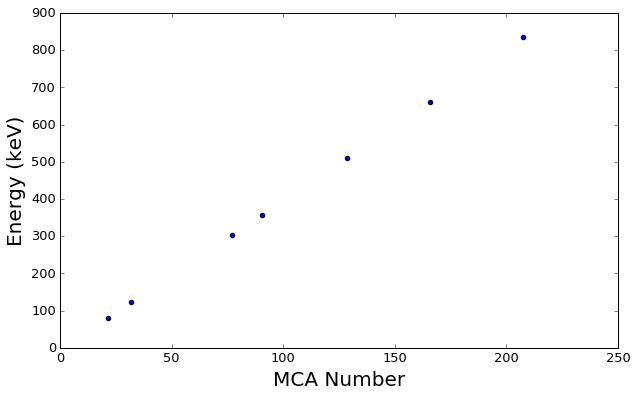

In [55]:
plt.figure(figsize=(10,6));
plt.scatter(Peaks,Energy);

plt.xlabel('MCA Number',fontsize=20);
plt.ylabel('Energy (keV)',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
#plt.savefig('Sample')

In [56]:
def myfun(N,a,b,c):
    ans = a + b*N + c*N**2  # this is y, "the function to be fit"
    return ans

In [57]:
p0 = [-2,1,0]

In [69]:
xlots = np.linspace(0,240)  # need lots of data points for smooth curve
yfit = np.zeros((len(Peaks),xlots.size))

plsq, pcov = curve_fit(myfun, Peaks, Energy, p0)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
a = plsq[0]
da = np.sqrt(pcov[0,0])
b = plsq[1]
db = np.sqrt(pcov[1,1])
c = plsq[2]
dc = np.sqrt(pcov[2,2])

yfit = myfun(xlots,plsq[0],plsq[1],plsq[2])  # use fit results for a, b, c
    
print('a = %.7f +/- %.7f' % (plsq[0], np.sqrt(pcov[0,0])))
print('b = %.7f +/- %.7f' % (plsq[1], np.sqrt(pcov[1,1])))
print('c = %.7f +/- %.7f' % (plsq[2], np.sqrt(pcov[2,2])))

a = -3.2717280 +/- 0.8945287
b = 3.9293985 +/- 0.0192341
c = 0.0005215 +/- 0.0000838


### 1

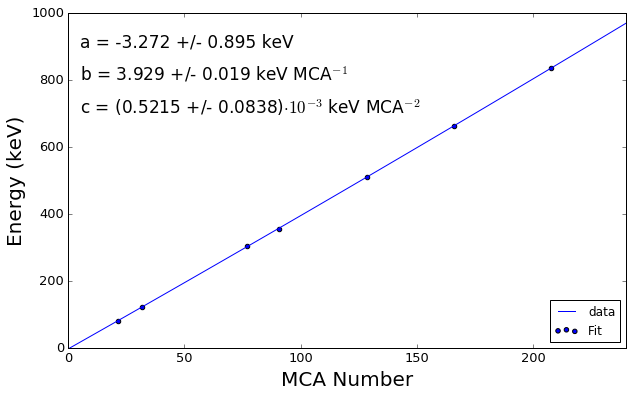

In [70]:
plt.figure(figsize=(10,6));
plt.scatter(Peaks,Energy);
plt.xlim(0,240)
plt.ylim(0,1000)
plt.xlabel('x (mm)');
plt.ylabel('y (mm)');
plt.plot(xlots,yfit);
plt.legend(['data','Fit'],loc='lower right');
plt.text(5,900,'a = %.3f +/- %.3f keV' % (plsq[0], np.sqrt(pcov[0,0])),size=17)
plt.text(5,800,'b = %.3f +/- %.3f keV MCA$^{-1}$' % (plsq[1], np.sqrt(pcov[1,1])),size=17)
plt.text(5,700,'c = (%.4f +/- %.4f)$\cdot 10^{-3}$ keV MCA$^{-2}$' % (plsq[2]*1e3, np.sqrt(pcov[2,2])*1e3),size=17)
plt.xlabel('MCA Number',fontsize=20);
plt.ylabel('Energy (keV)',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.savefig('Linear')

In [95]:
N = 102.40 #Channel number of 60 degree scattered photopeak
dN = 9.00

In [96]:
da/a

-0.27341170256261677

In [97]:
daN = np.sqrt((da/a)**2 + (dN/N)**2)*(a*N)
daN

-96.216179664182462

In [98]:
dbN2 = np.sqrt((db/b)**2 + 4*(dN/N)**2)*(b*N**2)
dbN2

7245.4749762501206

In [99]:
dcN3 = np.sqrt((dc/c**2) + 9*(dN/N)**2)*(c*N**3)
dcN3

9828.39015713564

In [100]:
dE = np.sqrt(daN**2 + dbN2**2 + dcN3**2)*1e-3 #Convert to KeV
dE

12.210791058141016

In [101]:
E = myfun(N,a,b,c)
E

404.56728438247916

In [102]:
Etheory = 661.7/(1+(661.7/511)*(1-np.cos(np.pi/3)))
Etheory

401.64958127932533

### 2

In [66]:
E_calc = np.array([myfun(entry,a,b,c) for entry in Peaks])

In [67]:
delta_E = np.mean(np.array([abs(E_calc[i] - Energy[i]) for i in np.arange(len(E_calc))]))
delta_E

0.5017305141188656

### 3

In [17]:
CS137Energy[0]

662

In [18]:
E_calc[0]

668.131030809398

In [19]:
myfun(416.77+22.48/2,a,b,c) - myfun(416.77-22.48/2,a,b,c)

37.176875180458865

In [20]:
myfun(291,a,b,c)

461.84675487365394

In [21]:
myfun(130.25,a,b,c)

203.17151562419369

### 6

In [22]:
#All in channels
CSfwhm = np.array([22.48])

BAfwhm = np.array([17.03,14,6.2])

COfwhm = np.array([32.1, 30.71])

In [23]:
fwhmChannels = np.hstack([CSfwhm,BAfwhm,COfwhm])

In [24]:
fwhmEnergy = np.array([abs(myfun(Peaks[i] + fwhmChannels[i]/2,a,b,c)
                           - myfun(Peaks[i] - fwhmChannels[i]/2,a,b,c)) for i in np.arange(len(Peaks))])

In [25]:
fwhmEnergy

array([ 37.17687518,  27.45540851,  22.46340688,   9.76846181,
        55.81419842,  52.76362264])

In [26]:
resolution = np.array([fwhmEnergy[i]/myfun(Peaks[i],a,b,c) for i in np.arange(len(Peaks))])

In [27]:
EPeaks = myfun(Peaks,a,b,c)

(array([ 0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14]),
 <a list of 7 Text yticklabel objects>)

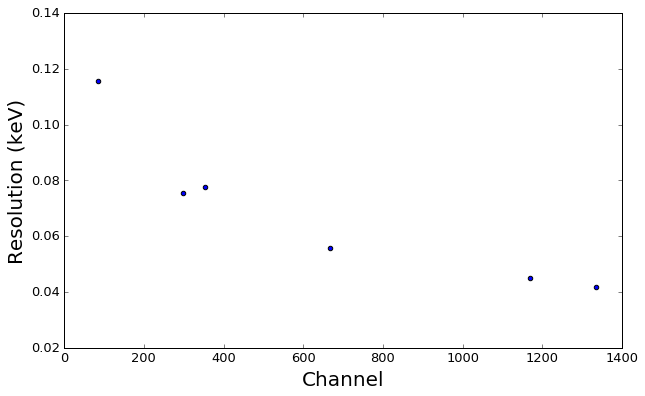

In [28]:
plt.figure(figsize=(10,6));
plt.scatter(EPeaks,resolution);

plt.xlabel('Channel',fontsize=20);
plt.ylabel('Resolution (keV)',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
#plt.savefig('Sample')

### 7

In [29]:
def myfun2(E,a,x):
    ans = a*E**x  # this is y, "the function to be fit"
    return ans

In [30]:
p02 = [.7,-1/2]

In [31]:
EPeaks

array([  668.13103081,   354.15848584,   297.28708713,    84.36433394,
        1334.45896011,  1169.60010483])

In [32]:
xlots2 = np.linspace(0,1400)  # need lots of data points for smooth curve
yfit2 = np.zeros((len(Peaks),xlots.size))

plsq, pcov = curve_fit(myfun2, EPeaks, resolution, p02)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
aa = plsq[0]
eaa = np.sqrt(pcov[0,0])
x = plsq[1]
ex = np.sqrt(pcov[1,1])


yfit2 = myfun2(xlots2,plsq[0],plsq[1])  # use fit results for a, b, c
    
print('a = %.7f +/- %.7f' % (plsq[0], np.sqrt(pcov[0,0])))
print('x = %.7f +/- %.7f' % (plsq[1], np.sqrt(pcov[1,1])))

a = 0.5579101 +/- 0.0663007
x = -0.3511851 +/- 0.0214736


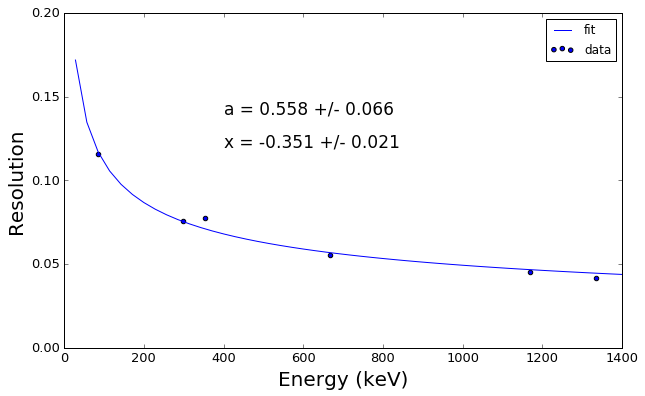

In [33]:
plt.figure(figsize=(10,6));
plt.scatter(EPeaks,resolution);
plt.xlim(0,1400)
plt.ylim(0,.2)
plt.xlabel('x (mm)');
plt.ylabel('y (mm)');
plt.plot(xlots2,yfit2);
plt.legend(['fit','data'],loc='best');
plt.text(400,.14,'a = %.3f +/- %.3f' % (plsq[0], np.sqrt(pcov[0,0])),size=17)
plt.text(400,.12,'x = %.3f +/- %.3f' % (plsq[1], np.sqrt(pcov[1,1])),size=17)
plt.xlabel('Energy (keV)',fontsize=20);
plt.ylabel('Resolution',fontsize = 20);

plt.xticks(size = 13);
plt.yticks(size = 13);
plt.savefig('Resolution')

### 8

In [34]:
myfun(786.45,a,b,c)

1294.281973868